# Personal Note on Numerical Data Visualization with Pandas

In [7]:
# Make your plot output stored in the notebook.
%matplotlib inline

import pandas
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')

dat = pandas.read_csv('river_pollution.csv')
dat

,RPI,TamSui,ZengWen,DaJia,TouQian,FengShan
0,RPI<=2.0,231.5,111.0,140.2,55.3,38.9
1,2.0<RPI<=3.0,31.5,23.8,0.0,2.4,4.1
2,3.1<RPI<=6.0,48.7,3.7,0.0,5.3,2.4
3,RPI>6.0,11.7,0.0,0.0,0.0,0.0


## Select a specific column

In [14]:
dat[dat.columns[1]]

0    231.5
1     31.5
2     48.7
3     11.7
Name: TamSui, dtype: float64

In [15]:
list(dat[dat.columns[1]])

[231.5, 31.5, 48.7, 11.7]

## Select a specific row

In [10]:
dat.loc[1]

RPI         2.0<RPI<=3.0
TamSui              31.5
ZengWen             23.8
DaJia                  0
TouQian              2.4
FengShan             4.1
Name: 1, dtype: object

In [13]:
list(dat.loc[0])[1:] # Skip the first item

[231.5, 111.0, 140.2, 55.3, 38.9]

## Drawing a stacked bar chart
For each plt.bar(), we are drawing each color one by one.

I mean... First we'll draw the green shit, then the yellow, brown and red shit.

In [23]:
names = list(dat.columns)[1:] # ['TamSui', 'ZengWen', 'DaJia', 'TouQian', 'FengShan']

In [27]:
rpis = [list(dat.iloc[x])[1:] for x in range(0, len(dat))]
rpis

[[231.5, 111.0, 140.2, 55.3, 38.9],
 [31.5, 23.8, 0.0, 2.4, 4.1],
 [48.7, 3.7, 0.0, 5.3, 2.4],
 [11.7, 0.0, 0.0, 0.0, 0.0]]

In [25]:
legend = list(dat[dat.columns[0]]) # ['RPI<=2.0', '2.0<RPI<=3.0', '3.1<RPI<=6.0', 'RPI>6.0']

In [26]:
colors = ['#A3E0CE', '#E0D6A3', '#DF955B', '#FF7E6D']

Now the critical part. For each plt.bar(), we have to decide the values of bottom parameters.

Addition on two `np.array()`s:
```
np.array([1, 3]) + np.array([2, 8]) -> np.array([1+2, 3+8]) = np.array([3, 11])
```

Text(0.5, 1.0, '<title goes here>')

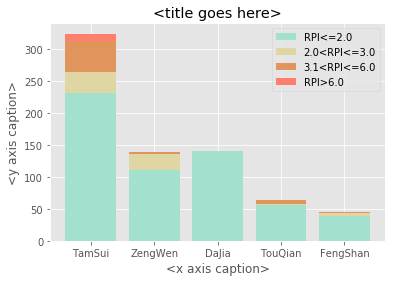

In [30]:
plt.bar(names, rpis[0], color=colors[0])
plt.bar(names, rpis[1], bottom=np.array(rpis[0]), color=colors[1])
plt.bar(names, rpis[2], bottom=np.array(rpis[0]) + np.array(rpis[1]), color=colors[2])
plt.bar(names, rpis[3], bottom=np.array(rpis[0]) + np.array(rpis[1]) + np.array(rpis[2]), color=colors[3])
plt.xlabel('<x axis caption>')
plt.ylabel('<y axis caption>')
plt.legend(legend)
plt.title('<title goes here>')

Without the bottom parameters, our chart will looks like this.

Text(0.5, 1.0, '<title goes here>')

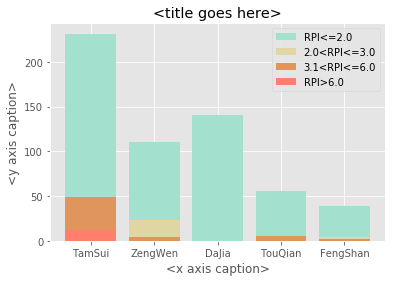

In [31]:
plt.bar(names, rpis[0], color=colors[0])
plt.bar(names, rpis[1], color=colors[1])
plt.bar(names, rpis[2], color=colors[2])
plt.bar(names, rpis[3], color=colors[3])
plt.xlabel('<x axis caption>')
plt.ylabel('<y axis caption>')
plt.legend(legend)
plt.title('<title goes here>')